# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
digits = load_digits()

In [3]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
labels = pd.Series(digits["target"])
df = pd.DataFrame(digits["data"])

In [5]:
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


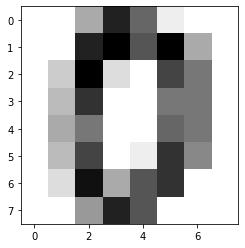

In [6]:
first_image = df.iloc[0]
np_image = first_image.values
np_image = np_image.reshape(8,8)
plt.imshow(np_image, cmap='gray_r')

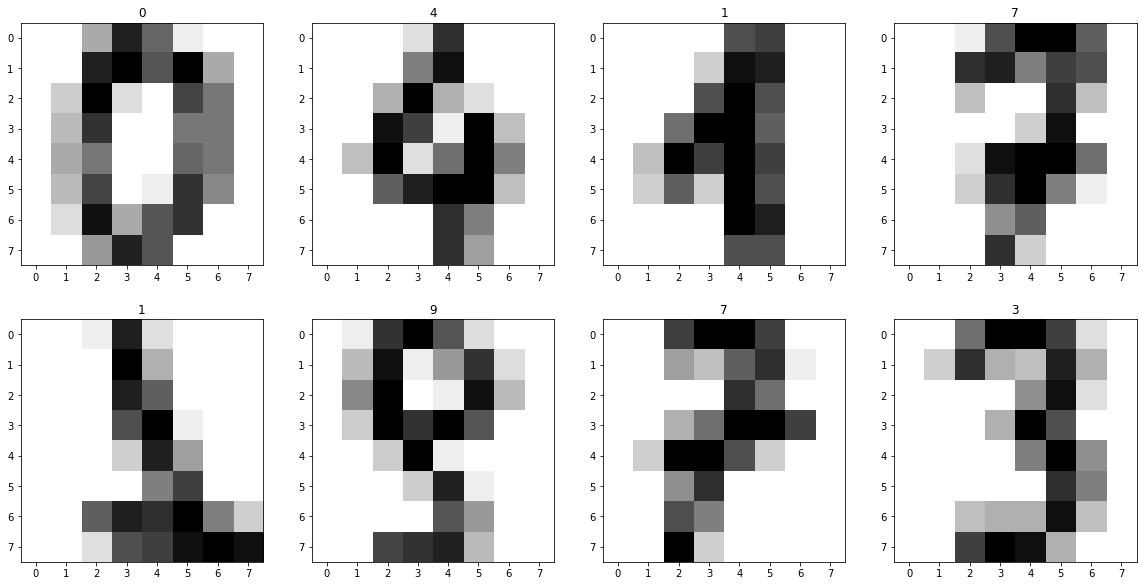

In [7]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))

#Row1
ax[0, 0].imshow(df.iloc[0].values.reshape(8, 8), cmap='gray_r')
ax[0, 0].title.set_text(labels.iloc[0])
ax[0, 1].imshow(df.iloc[100].values.reshape(8, 8), cmap='gray_r')
ax[0, 1].title.set_text(labels.iloc[100])
ax[0, 2].imshow(df.iloc[200].values.reshape(8, 8), cmap='gray_r')
ax[0, 2].title.set_text(labels.iloc[200])
ax[0, 3].imshow(df.iloc[300].values.reshape(8, 8), cmap='gray_r')
ax[0, 3].title.set_text(labels.iloc[300])

#Row2
ax[1, 0].imshow(df.iloc[1000].values.reshape(8, 8), cmap='gray_r')
ax[1, 0].title.set_text(labels.iloc[1000])
ax[1, 1].imshow(df.iloc[1100].values.reshape(8, 8), cmap='gray_r')
ax[1, 1].title.set_text(labels.iloc[1100])
ax[1, 2].imshow(df.iloc[1200].values.reshape(8, 8), cmap='gray_r')
ax[1, 2].title.set_text(labels.iloc[1200])
ax[1, 3].imshow(df.iloc[1300].values.reshape(8, 8), cmap='gray_r')
ax[1, 3].title.set_text(labels.iloc[1300])

# Modelling with KNN

The KNN model is a non-linear model which is more an algorithm than a model.

KNN compares observations in the test set to that of those in the training set.

The algorithm looks for similar observations in the training set with that of test set.

Linear and logistic regression models assume linearity between the features and the target.

The algorithm finds label with the most nearby observation and assigns that as prediction to the unseen observationm

Before we apply the KNN model on the data set, we:

- Split data train and test sets
- A pipeline set up for testing and training models
- KNN classifier for training knn models named train()
- test() function tests the model and cross_validate() performs 4 fold cross validation using train() and test()
- Plot the classification accuracies with different k values

In [8]:
def knn_train(neighbors, features, labels):
    knn = KNeighborsClassifier(n_neighbors=neighbors)
    knn.fit(features, labels)
    return knn

In [9]:
def knn_test(knn, features, labels):
    predictions = knn.predict(features)
    
    train_test_df = pd.DataFrame()
    train_test_df["label"] = labels
    train_test_df["prediction"] = predictions
    return (sum(train_test_df.label == train_test_df.prediction) / len(train_test_df))

In [10]:
def cross_validation(k, df, labels):
    fold_accuracies = []
    kf = KFold(n_splits=4)
    for train_index, test_index in kf.split(df):
        
        train_features, test_features = df.loc[train_index], df.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        
        model = knn_train(k, test_features, test_labels)
        fold_accuracies.append(knn_test(model, test_features, test_labels))
    return fold_accuracies

In [11]:
accuracies = []
for k in range(1,25):
    knn_accuracies = cross_validation(k, df, labels)
    acc = np.mean(knn_accuracies)
    accuracies.append(acc)
    print("K= ", k, " Accuracy: ", acc)

K=  1  Accuracy:  1.0
K=  2  Accuracy:  0.9910937886661717
K=  3  Accuracy:  0.9910962633011631
K=  4  Accuracy:  0.9894258846820094
K=  5  Accuracy:  0.9899826775550606
K=  6  Accuracy:  0.9877542687453601
K=  7  Accuracy:  0.9883110616184113
K=  8  Accuracy:  0.9860838901262063
K=  9  Accuracy:  0.9855270972531551
K=  10  Accuracy:  0.9827443702053947
K=  11  Accuracy:  0.9810764662212325
K=  12  Accuracy:  0.9805184360306854
K=  13  Accuracy:  0.9805184360306853
K=  14  Accuracy:  0.9777369463004206
K=  15  Accuracy:  0.9799616431576341
K=  16  Accuracy:  0.9771801534273694
K=  17  Accuracy:  0.9738393961890621
K=  18  Accuracy:  0.9721727295223954
K=  19  Accuracy:  0.9705035882207375
K=  20  Accuracy:  0.9699467953476862
K=  21  Accuracy:  0.9688344469190795
K=  22  Accuracy:  0.9699480326651819
K=  23  Accuracy:  0.9649381341252166
K=  24  Accuracy:  0.9643813412521653


Text(0, 0.5, 'Accuracy')

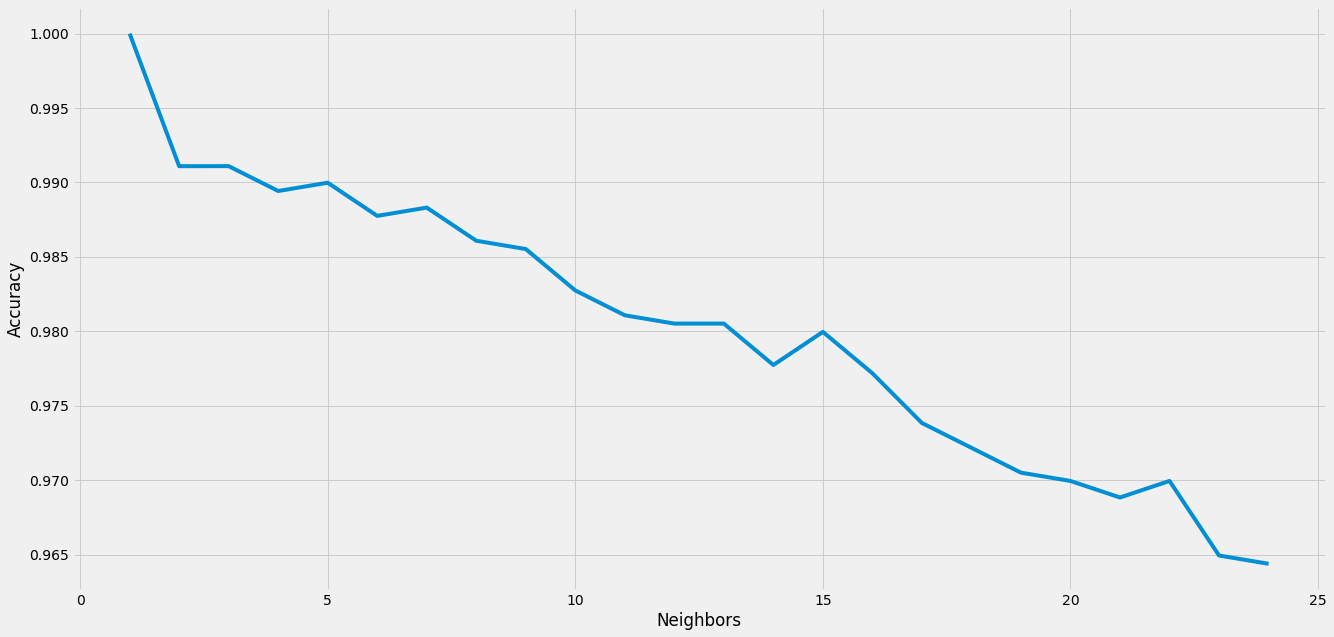

In [12]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20, 10))
plt.plot(range(1, 25), accuracies)
plt.xlabel("Neighbors")
plt.ylabel("Accuracy")

# MLP Classifier

## Single Hidden Layer Neural Networks

In [13]:
def nn_train(neuon_arch, features, labels):
    mlp = MLPClassifier(hidden_layer_sizes=neuon_arch,  max_iter=1500)
    mlp.fit(features, labels)
    return mlp

In [14]:
def test(model, features, labels):
    predictions = model.predict(features)
    
    train_test_df = pd.DataFrame()
    train_test_df["label"] = labels
    train_test_df["prediction"] = predictions
    return (sum(train_test_df.label == train_test_df.prediction) / len(train_test_df))

def cross_validate(neuron_arch, data, labels):
    fold_accuracies = []
    train_accuracies = []
    
    kf = KFold(n_splits = 4,)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        
        model = nn_train(neuron_arch, train_features, train_labels)
        
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
        
        train_accuracy = test(model, train_features, train_labels)
        train_accuracies.append(train_accuracy)
    return fold_accuracies, train_accuracies

In [23]:
nn_one_neurons = [
    (8,),
    (16,),
    (32,),
    (64,),
    (128,),
    (256,)
]
nn_one_accuracies = []
nn_one_train_accuracies = []

In [24]:
for n in nn_one_neurons:
    nn_acc, nn_tacc = cross_validate(n, df, labels)
    nn_one_accuracies.append(np.mean(nn_acc))
    nn_one_train_accuracies.append(np.mean(nn_tacc))

Text(0.5, 1.0, 'Single Hidden Layer NN')

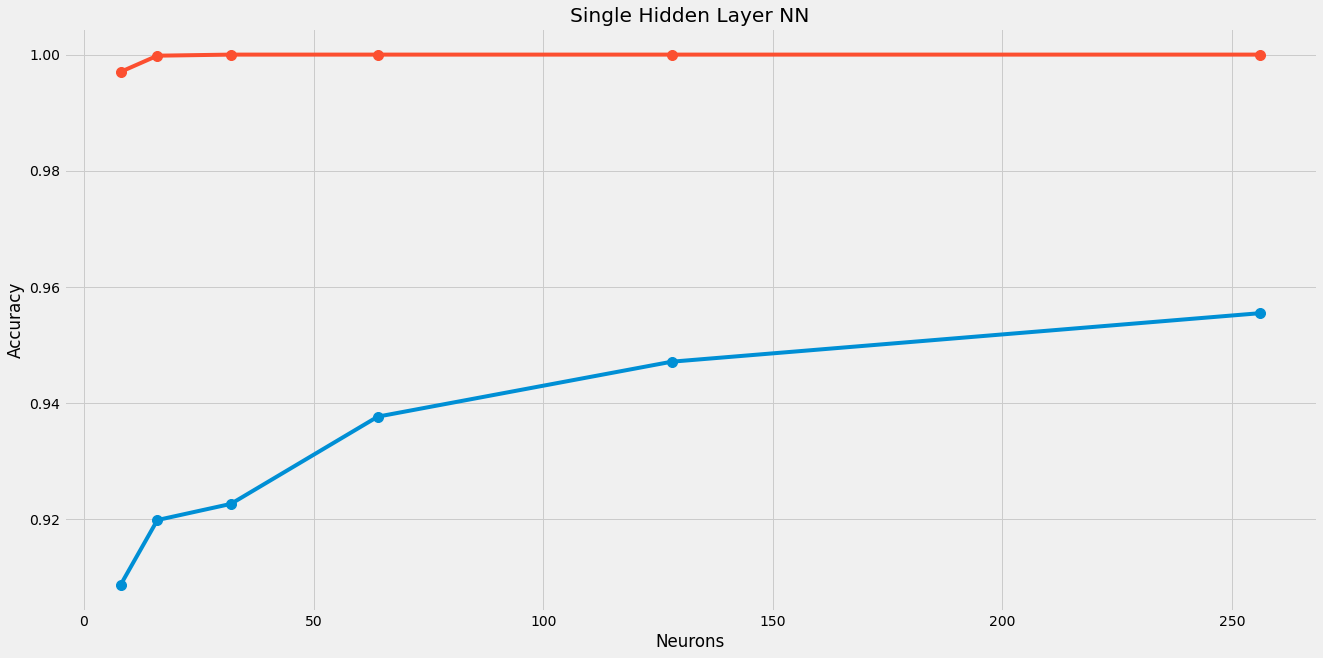

In [50]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20, 10))
plt.plot([i[0] for i in nn_one_neurons], nn_one_accuracies, marker=".", markersize=20)
plt.plot([i[0] for i in nn_one_neurons], nn_one_train_accuracies, marker=".", markersize=20)
plt.xlabel("Neurons")
plt.ylabel("Accuracy")
plt.title("Single Hidden Layer NN")

- There is an improvement in the accuracy by adding more neurons to the single hidden layer from 86% to 94%
- The accuracy calculated doesn't tell about the false or true positives or false or true negatives
- The KNN model already achieved 96% accuracy. Single Hidden Layer using neural network doesn't have advantage over the former.

## Two Hidden Layer Neural Networks

In [39]:
nn_one_neurons2 = [
    (8, 8),
    (16, 16),
    (32, 32),
    (64, 64),
    (128, 128),
    (256, 256)
]
nn_one_accuracies2 = []
nn_one_train_accuracies2 = []

In [40]:
for n in nn_one_neurons2:
    nn_acc, nn_tacc = cross_validate(n, df, labels)
    nn_one_accuracies2.append(np.mean(nn_acc))
    nn_one_train_accuracies2.append(np.mean(nn_tacc))

Text(0.5, 1.0, '2 Hidden Layer NN')

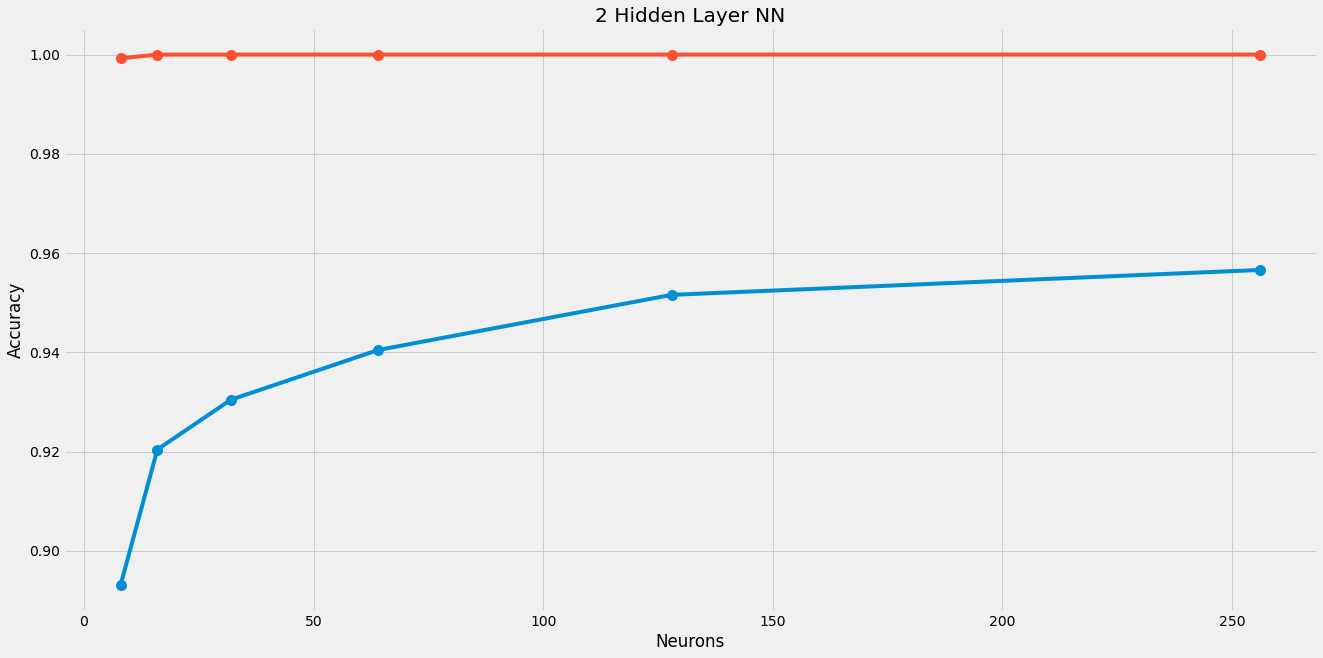

In [49]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20, 10))
plt.plot([i[0] for i in nn_one_neurons2], nn_one_accuracies2, marker=".", markersize=20)
plt.plot([i[0] for i in nn_one_neurons2], nn_one_train_accuracies2, marker=".", markersize=20)
plt.xlabel("Neurons")
plt.ylabel("Accuracy")
plt.title("2 Hidden Layer NN")

Results with models with two layers were similar to the scores reached with one layer.

## Three Hidden Layer Neural Networks

In [42]:
nn_one_neurons3 = [
    (10, 10, 10),
    (16, 16, 16),
    (32, 32, 322),
    (64, 64, 644),
    (128, 128, 128),
    (256, 256, 256)
]
nn_one_accuracies3 = []
nn_one_train_accuracies3 = []

In [43]:
for n in nn_one_neurons3:
    nn_acc, nn_tacc = cross_validate(n, df, labels)
    nn_one_accuracies3.append(np.mean(nn_acc))
    nn_one_train_accuracies3.append(np.mean(nn_tacc))

Text(0.5, 1.0, '3 Hidden Layer NN')

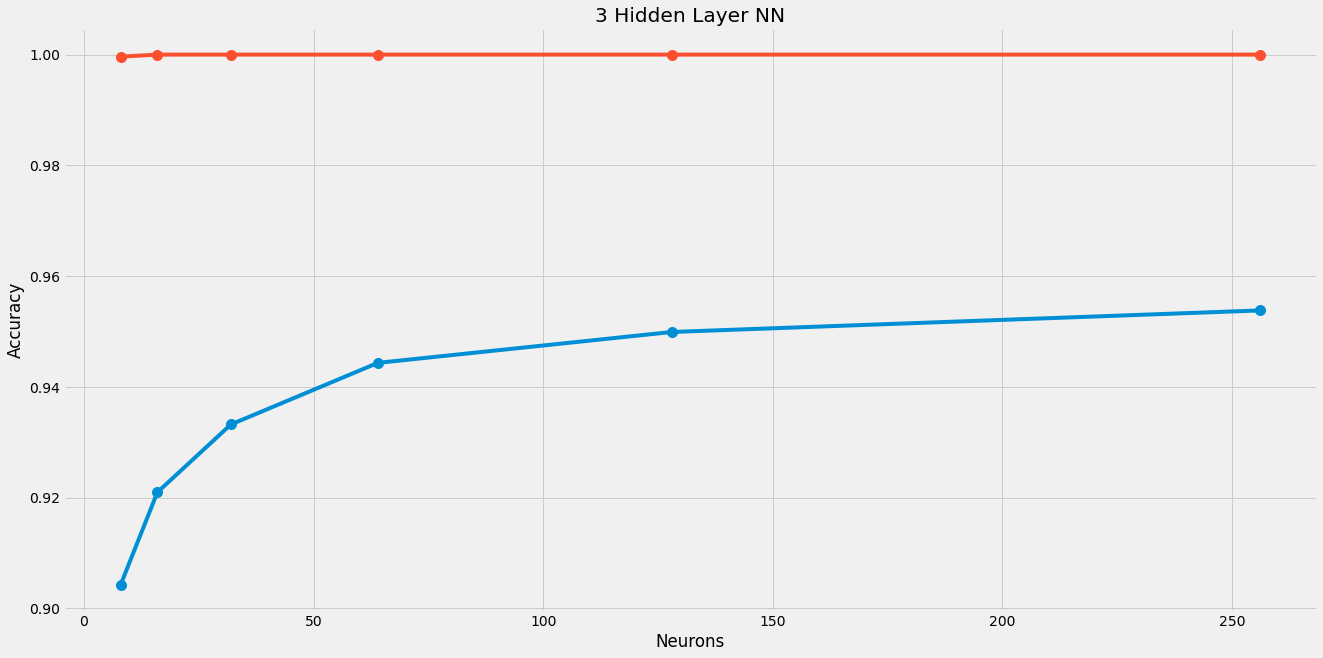

In [48]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20, 10))
plt.plot([i[0] for i in nn_one_neurons2], nn_one_accuracies3, marker=".", markersize=20)
plt.plot([i[0] for i in nn_one_neurons2], nn_one_train_accuracies3, marker=".", markersize=20)
plt.xlabel("Neurons")
plt.ylabel("Accuracy")
plt.title("3 Hidden Layer NN")

### Comparison

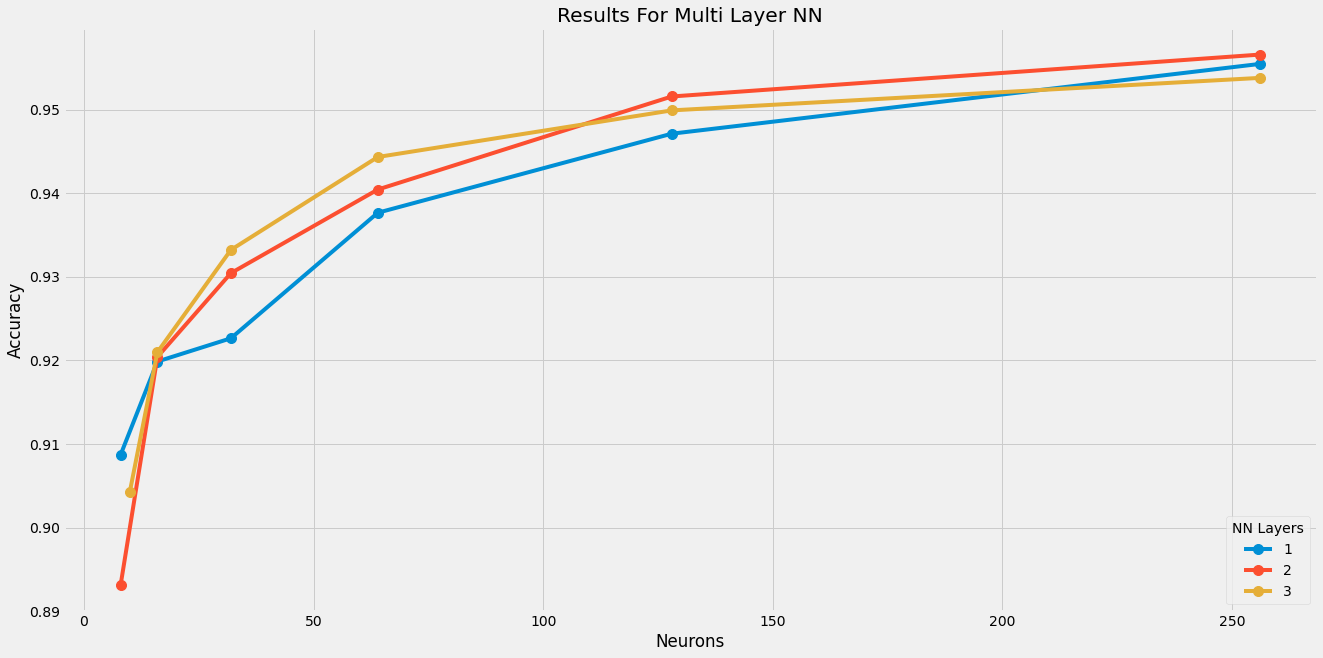

In [57]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20, 10))
plt.plot([i[0] for i in nn_one_neurons], nn_one_accuracies, marker=".", markersize=20, label="1")
plt.plot([i[0] for i in nn_one_neurons2], nn_one_accuracies2, marker=".", markersize=20, label="2")
plt.plot([i[0] for i in nn_one_neurons3], nn_one_accuracies3, marker=".", markersize=20, label="3")
plt.xlabel("Neurons")
plt.ylabel("Accuracy")
plt.title("Results For Multi Layer NN")
plt.legend(loc="lower right", title="NN Layers")

The 2 Hidden Layer Neural Network seems to be best approach.